In [2]:
###########################Modulos primarios#############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
###########################Modulos pipelines#############################################
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
###########################Modulos modelos#############################################
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
###########################Exportar modelos#############################################
import joblib

In [3]:
df = pd.read_csv("../data/german_credit_data-3.csv")

In [4]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

# New Pipeline

## Pipeline Test 1

In [5]:
features = ['Age','Credit amount','Duration', 'Checking account', 'Housing', 'Purpose']
y_train = (train['Risk']=='bad').astype('int')
X_train = train[features]

In [6]:
numericImputer = SimpleImputer(strategy = 'mean')
categoricImputer = SimpleImputer(strategy = 'most_frequent')
encoder = OneHotEncoder()

In [7]:
scaler = MinMaxScaler()

In [8]:
numericPipeline = Pipeline([
    ("imputar_numeros", numericImputer),
    ("escalado", scaler)
])

In [9]:
categoricalPipeline = Pipeline([
    ("imputar_categorias", categoricImputer),
    ("oneHot", encoder)
])

In [10]:
transformer =\
ColumnTransformer([("pipeline numerico", numericPipeline, [0, 1, 2]),
                   ("pipeline categorico", categoricalPipeline, [3, 4, 5])
                ])

In [11]:
X_train_transform = transformer.fit_transform(X_train)

In [12]:
joblib.dump(transformer, "../Models/pipelines/pipeline2_6features.joblib")

['../Models/pipelines/pipeline2_6features.joblib']

In [13]:
transformer1 = joblib.load("../Models/pipelines/pipeline2_6features.joblib")

## Pipeline test 2 PCA

In [14]:
features = ['Age','Credit amount','Duration', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
y_train = (train['Risk']=='bad').astype('int')
X_train = train[features]

In [15]:
numericImputer = SimpleImputer(strategy = 'mean')
categoricImputer = SimpleImputer(strategy = 'most_frequent')
encoder = OneHotEncoder()

scaler = MinMaxScaler()

numericPipeline = Pipeline([
    ("imputar_numeros", numericImputer),
    ("escalado", scaler)
])

categoricalPipeline = Pipeline([
    ("imputar_categorias", categoricImputer),
    ("oneHot", encoder)
])

transformer1 =\
ColumnTransformer([("pipeline numerico", numericPipeline, [0, 1, 2]),
                   ("pipeline categorico", categoricalPipeline, [3, 4, 5, 6, 7, 8])
                ])

In [16]:
X_train_transform_fit = transformer.fit_transform(X_train)

In [17]:
joblib.dump(transformer, "../Models/pipelines/pipeline3_all_features.joblib")

['../Models/pipelines/pipeline3_all_features.joblib']

# Test 1 new features

In [18]:
validation = []

In [19]:

tags = ["Logistic", "KNN", "D_Tree", "Rand_Fo", "SVM"]
X_train_transformed = transformer.transform(X_train)

In [20]:
cross_v = cross_validate(LogisticRegression(), X_train_transformed , y_train, cv=5, return_train_score=True,
              scoring=['accuracy'])

print("Train:      {} +- {}". format(cross_v["train_accuracy"].mean(),
                         cross_v["train_accuracy"].std()))
print("Validation: {} +- {}". format(cross_v["test_accuracy"].mean(),
                         cross_v["test_accuracy"].std()))
validation.append(cross_v["test_accuracy"].mean())

Train:      0.7228571428571428 +- 0.006328587552381889
Validation: 0.7057142857142857 +- 0.009476070829586866


In [21]:
cross_v_1 = cross_validate(KNeighborsClassifier(n_neighbors=20), X_train_transformed , y_train, cv=5, return_train_score=True,
              scoring=['accuracy'])
print("Train:      {} +- {}". format(cross_v_1["train_accuracy"].mean(),
                         cross_v_1["train_accuracy"].std()))
print("Validation: {} +- {}". format(cross_v_1["test_accuracy"].mean(),
                         cross_v_1["test_accuracy"].std()))
validation.append(cross_v_1["test_accuracy"].mean())

Train:      0.7203571428571429 +- 0.007107053122190117
Validation: 0.71 +- 0.02147613768338987


In [22]:
cross_v_2 = cross_validate(DecisionTreeClassifier(max_depth=3), X_train_transformed , y_train, cv=5, return_train_score=True,
              scoring=['accuracy'])
print("Train:      {} +- {}". format(cross_v_2["train_accuracy"].mean(),
                         cross_v_2["train_accuracy"].std()))
print("Validation: {} +- {}". format(cross_v_2["test_accuracy"].mean(),
                         cross_v_2["test_accuracy"].std()))
validation.append(cross_v_2["test_accuracy"].mean())

Train:      0.7471428571428571 +- 0.0040089186286863514
Validation: 0.7057142857142857 +- 0.018844151368961327


In [23]:
cross_v_3 = cross_validate(RandomForestClassifier(n_estimators=100,max_depth=4), X_train_transformed , y_train, cv=5, return_train_score=True,
              scoring=['accuracy'])
print("Train:      {} +- {}". format(cross_v_3["train_accuracy"].mean(),
                         cross_v_3["train_accuracy"].std()))
print("Validation: {} +- {}". format(cross_v_3["test_accuracy"].mean(),
                         cross_v_3["test_accuracy"].std()))
validation.append(cross_v_3["test_accuracy"].mean())

Train:      0.7621428571428572 +- 0.007089083300456881
Validation: 0.7214285714285714 +- 0.013552618543578756


In [24]:
cross_v_4 = cross_validate(SVC(kernel='rbf', C=5), X_train_transformed , y_train, cv=5, return_train_score=True,
              scoring=['accuracy'])
print("Train {} +- {}". format(cross_v_4["train_accuracy"].mean(),
                         cross_v_4["train_accuracy"].std()))
print("Validation {} +- {}". format(cross_v_4["test_accuracy"].mean(),
                         cross_v_4["test_accuracy"].std()))
validation.append(cross_v_4["test_accuracy"].mean())

Train 0.7489285714285715 +- 0.004738035414793411
Validation 0.7014285714285714 +- 0.026496052844273428


# PCA

In [25]:

transformer2 = joblib.load("../Models/pipelines/pipeline3_all_features.joblib")

In [26]:
X_train_transformed_pca = transformer.transform(X_train)

In [27]:
pca = PCA(n_components=1)
pca.fit(X_train_transformed_pca)
pca_x = pca.transform(X_train_transformed_pca)

## PCA Models test

In [28]:
validation_pca = []

In [29]:

cross_v_pca = cross_validate(LogisticRegression(), X_train_transformed_pca , y_train, cv=5, return_train_score=True,
              scoring=['accuracy'])

print("Train:      {} +- {}". format(cross_v_pca["train_accuracy"].mean(),
                         cross_v_pca["train_accuracy"].std()))
print("Validation: {} +- {}". format(cross_v_pca["test_accuracy"].mean(),
                         cross_v_pca["test_accuracy"].std()))
validation_pca.append(cross_v_pca["test_accuracy"].mean())

Train:      0.7228571428571428 +- 0.006328587552381889
Validation: 0.7057142857142857 +- 0.009476070829586866


In [30]:
cross_v_1_pca = cross_validate(KNeighborsClassifier(n_neighbors=20), X_train_transformed_pca , y_train, cv=5, return_train_score=True,
              scoring=['accuracy'])
print("Train:      {} +- {}". format(cross_v_1_pca["train_accuracy"].mean(),
                         cross_v_1_pca["train_accuracy"].std()))
print("Validation: {} +- {}". format(cross_v_1_pca["test_accuracy"].mean(),
                         cross_v_1_pca["test_accuracy"].std()))
validation_pca.append(cross_v_1_pca["test_accuracy"].mean())

Train:      0.7203571428571429 +- 0.007107053122190117
Validation: 0.71 +- 0.02147613768338987


In [31]:
cross_v_2_pca = cross_validate(DecisionTreeClassifier(max_depth=3), X_train_transformed_pca , y_train, cv=5, return_train_score=True,
              scoring=['accuracy'])
print("Train:      {} +- {}". format(cross_v_2_pca["train_accuracy"].mean(),
                         cross_v_2_pca["train_accuracy"].std()))
print("Validation: {} +- {}". format(cross_v_2_pca["test_accuracy"].mean(),
                         cross_v_2_pca["test_accuracy"].std()))
validation_pca.append(cross_v_2_pca["test_accuracy"].mean())

Train:      0.7471428571428571 +- 0.0040089186286863514
Validation: 0.7042857142857143 +- 0.018952141659173728


In [32]:
cross_v_3_pca = cross_validate(RandomForestClassifier(n_estimators=100,max_depth=4), X_train_transformed_pca , y_train, cv=5, return_train_score=True,
              scoring=['accuracy'])
print("Train:      {} +- {}". format(cross_v_3_pca["train_accuracy"].mean(),
                         cross_v_3_pca["train_accuracy"].std()))
print("Validation: {} +- {}". format(cross_v_3_pca["test_accuracy"].mean(),
                         cross_v_3_pca["test_accuracy"].std()))
validation_pca.append(cross_v_3_pca["test_accuracy"].mean())

Train:      0.7571428571428571 +- 0.006681531047810616
Validation: 0.7157142857142857 +- 0.005345224838248469


In [33]:
cross_v_4_pca = cross_validate(SVC(kernel='rbf', C=5), X_train_transformed_pca , y_train, cv=5, return_train_score=True,
              scoring=['accuracy'])
print("Train {} +- {}". format(cross_v_4_pca["train_accuracy"].mean(),
                         cross_v_4_pca["train_accuracy"].std()))
print("Validation {} +- {}". format(cross_v_4_pca["test_accuracy"].mean(),
                         cross_v_4_pca["test_accuracy"].std()))
validation_pca.append(cross_v_4_pca["test_accuracy"].mean())

Train 0.7489285714285715 +- 0.004738035414793411
Validation 0.7014285714285714 +- 0.026496052844273428


In [34]:
validation_pca

[0.7057142857142857,
 0.71,
 0.7042857142857143,
 0.7157142857142857,
 0.7014285714285714]

In [35]:
validation

[0.7057142857142857,
 0.71,
 0.7057142857142857,
 0.7214285714285714,
 0.7014285714285714]

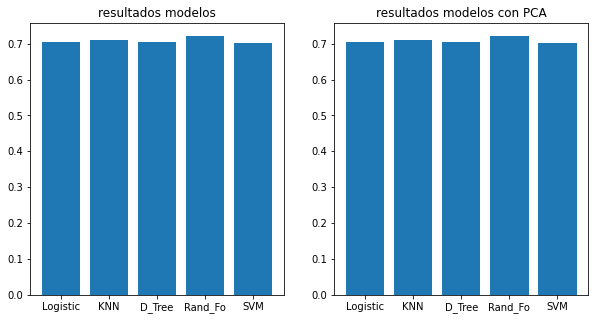

In [36]:
figure, axis = plt.subplots(1,2,figsize=(10,5))
axis[0].bar(tags, validation)
axis[0].set_title("resultados modelos")
axis[1].bar(tags, validation)
axis[1].set_title("resultados modelos con PCA")
plt.show()

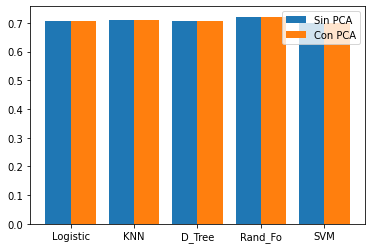

In [37]:
X_axis = np.arange(len(tags))
plt.bar(X_axis - 0.2, validation, 0.4, label = "Sin PCA")
plt.bar(X_axis + 0.2, validation, 0.4, label = "Con PCA")

plt.xticks(X_axis, tags)
plt.legend()
plt.show()

In [38]:
model = RandomForestClassifier()

In [39]:
model.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [ ]:
joblib.dump(model, "../Models/estimators/model02_new_features.joblib")